In [1]:
!pip install scikit-learn pandas matplotlib seaborn --quiet


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings("ignore")


In [3]:
# Load data
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
texts = newsgroups.data
labels = newsgroups.target
target_names = newsgroups.target_names

print(f"Number of documents: {len(texts)}")
print(f"Number of categories: {len(target_names)}")


Number of documents: 18846
Number of categories: 20


In [4]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_tfidf = vectorizer.fit_transform(texts)

print(f"TF-IDF matrix shape: {X_tfidf.shape}")


TF-IDF matrix shape: (18846, 10000)


In [5]:
svd = TruncatedSVD(n_components=2, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)

print(f"Shape after SVD: {X_reduced.shape}")


Shape after SVD: (18846, 2)


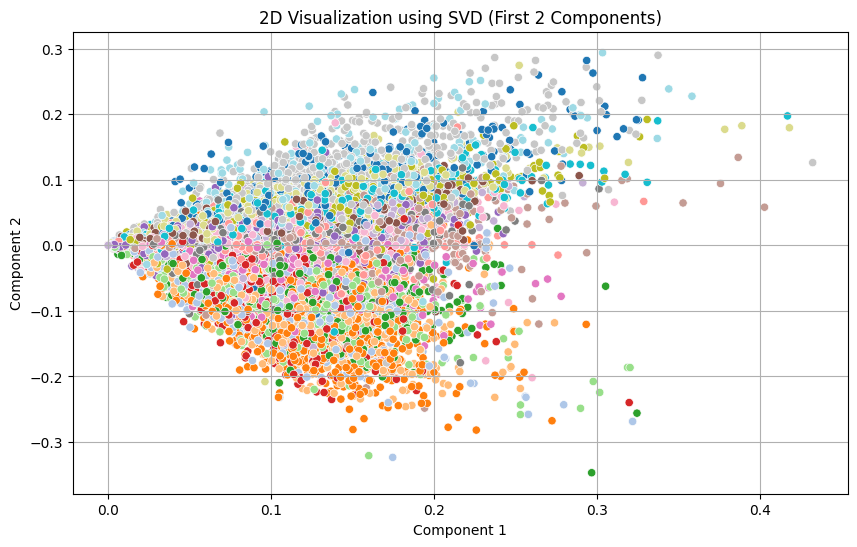

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=labels, palette='tab20', legend=False)
plt.title("2D Visualization using SVD (First 2 Components)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()


In [7]:
kmeans = KMeans(n_clusters=20, random_state=42)
cluster_labels = kmeans.fit_predict(X_reduced)

sil_score = silhouette_score(X_reduced, cluster_labels)
print(f"Silhouette Score: {sil_score:.3f}")


Silhouette Score: 0.334


Adjusted Rand Index (ARI) between actual and predicted labels: 0.049


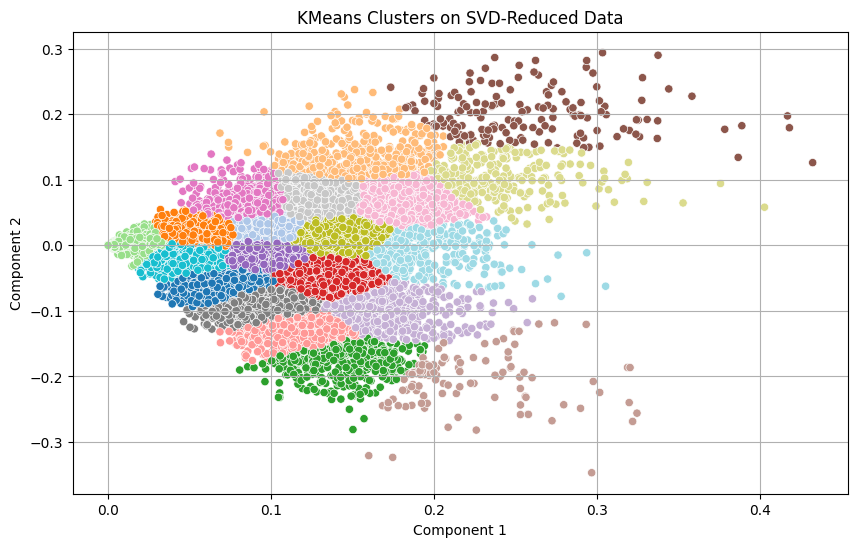

In [8]:
from sklearn.metrics import adjusted_rand_score

ari_score = adjusted_rand_score(labels, cluster_labels)
print(f"Adjusted Rand Index (ARI) between actual and predicted labels: {ari_score:.3f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=cluster_labels, palette='tab20', legend=False)
plt.title("KMeans Clusters on SVD-Reduced Data")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()
